# Árvores de decisão - parte I: tratamento dos dados

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv('demo01.csv')
dados.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


Não há variável única por cliente, logo não há dados duplicados

In [258]:
dados.shape

(16650, 16)

In [259]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

##### Corrigindo tipos dos dados

In [260]:
dados['idade'] = dados['idade'].astype(int)
dados['tempo_emprego'] = dados['tempo_emprego'].astype(int)
dados['qt_pessoas_residencia'] = dados['qt_pessoas_residencia'].astype(int)

##### Dados faltantes

In [261]:
dados.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

##### Variável resposta

In [262]:
dados.mau.value_counts()

False    16260
True       390
Name: mau, dtype: int64

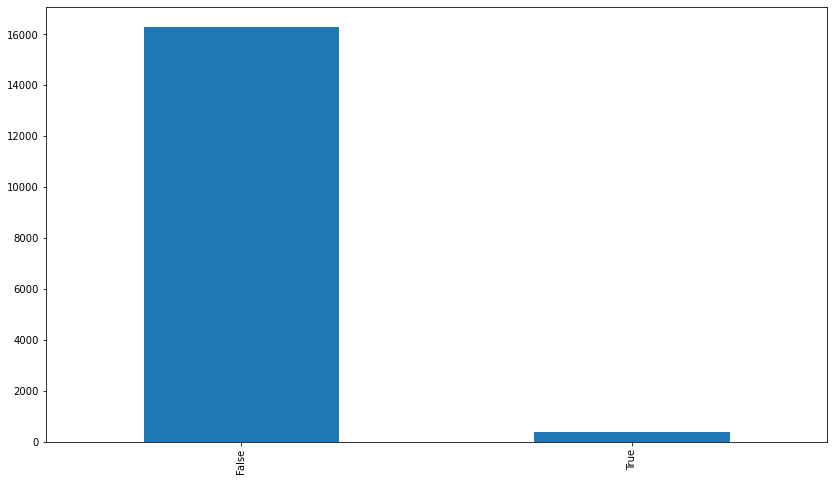

In [263]:
var = 'mau'
grafico_barras = dados[var].value_counts().plot.bar()

##### Variável explicativas

<AxesSubplot:xlabel='educacao', ylabel='count'>

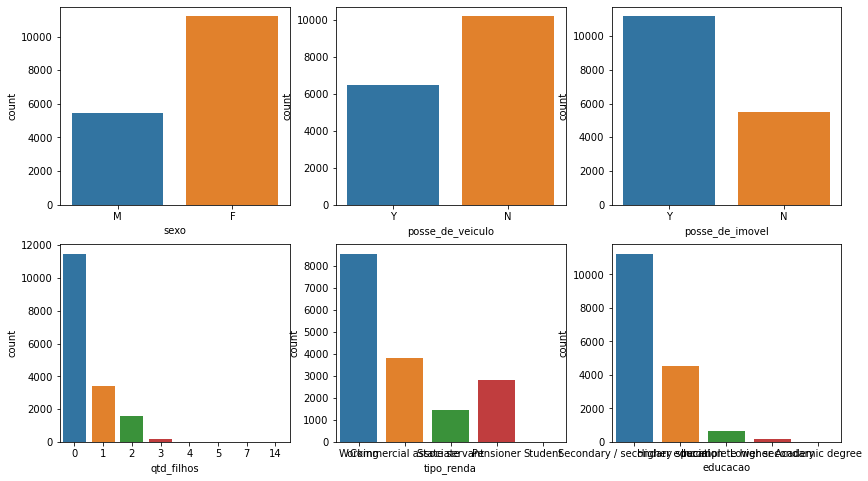

In [264]:
plt.rc('figure', figsize=(14, 8))
fig, axes = plt.subplots(2, 3)

sns.countplot(ax = axes[0, 0], x='sexo', data=dados)
sns.countplot(ax = axes[0, 1], x='posse_de_veiculo', data=dados)
sns.countplot(ax = axes[0, 2], x='posse_de_imovel', data=dados)
sns.countplot(ax = axes[1, 0], x='qtd_filhos', data=dados)
sns.countplot(ax = axes[1, 1], x='tipo_renda', data=dados)
sns.countplot(ax = axes[1, 2], x='educacao', data=dados)

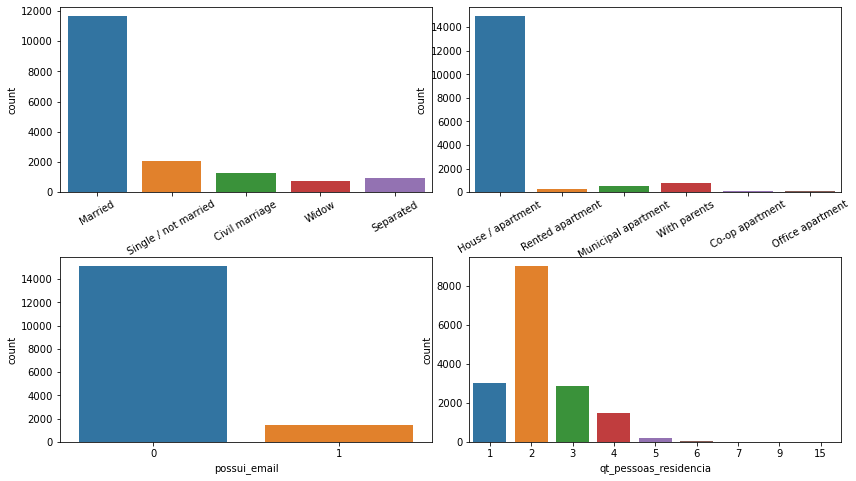

In [265]:
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='estado_civil', data=dados)
axes[0, 0].tick_params(axis="x", rotation = 30)
sns.countplot(ax = axes[0, 1], x='tipo_residencia', data=dados)
axes[0, 1].tick_params(axis="x", rotation = 30)
sns.countplot(ax = axes[1, 0], x='possui_email', data=dados)
sns.countplot(ax = axes[1, 1], x='qt_pessoas_residencia', data=dados)

plt.subplots_adjust(wspace=0.1, hspace=0.35)

<AxesSubplot:xlabel='idade', ylabel='count'>

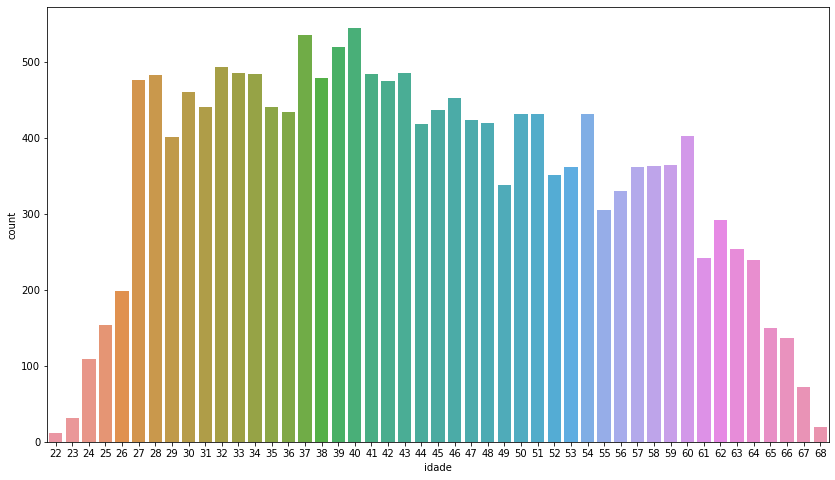

In [266]:
sns.countplot(x='idade', data=dados)

<AxesSubplot:xlabel='tempo_emprego', ylabel='count'>

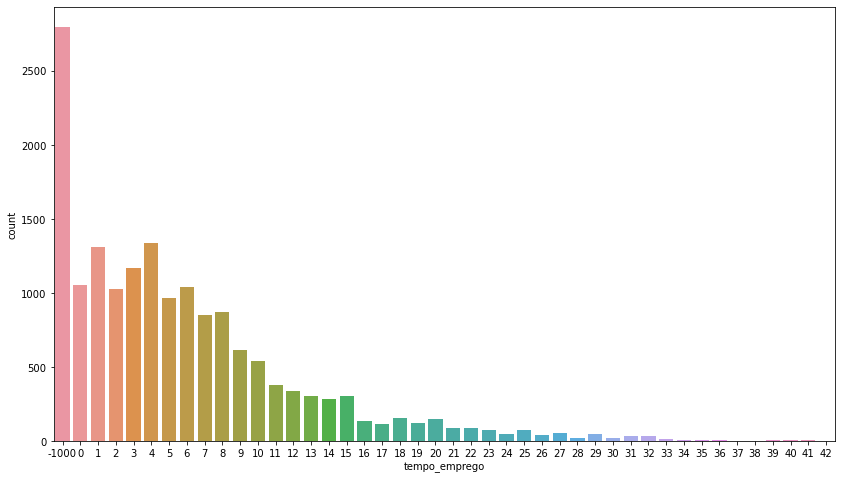

In [267]:
sns.countplot(x='tempo_emprego', data=dados)

In [268]:
df_adimplente = dados[dados['mau'] == 0]
df_inadimplente = dados[dados['mau'] == 1]

In [269]:
dados

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58,3,1,0,0,0,2,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,1,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,1,0,1,1,1,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46,2,1,1,1,1,2,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29,3,1,0,0,0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54,9,1,0,0,0,2,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43,7,1,1,1,0,2,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30,9,1,1,0,0,2,True
16648,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30,9,1,1,0,0,2,True


In [270]:
dados.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [271]:
dados.possui_celular.value_counts()

1    16650
Name: possui_celular, dtype: int64

100% dos clientes possuem celulares, talvez não seja uma variável útil para a análise. Aproveitando para transformar as variáveis binárias

In [272]:
dados.drop(['possui_celular'], axis = 1, inplace = True)

In [273]:
genero = {'F' : 1, 'M': 0}
sim_nao = {'Y' : 1, 'N': 0}
v_f = {True : 1, False : 0}

dados.sexo = dados.sexo.map(genero)
dados.posse_de_veiculo = dados.posse_de_veiculo.map(sim_nao)
dados.posse_de_imovel = dados.posse_de_imovel.map(sim_nao)
dados.mau = dados.mau.map(v_f)

dados.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,1,1,0,Working,Secondary / secondary special,Married,House / apartment,58,3,0,0,0,2,0
1,1,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,0,1,1,1,0
2,1,0,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52,8,0,1,1,1,0
3,0,1,1,0,Working,Higher education,Married,House / apartment,46,2,1,1,1,2,0
4,1,1,0,0,Working,Incomplete higher,Married,House / apartment,29,3,0,0,0,2,0


##### Descrição dos dados

In [274]:
dados.select_dtypes('object').describe().transpose()

,count,unique,top,freq
tipo_renda,16650,5,Working,8565
educacao,16650,5,Secondary / secondary special,11245
estado_civil,16650,5,Married,11680
tipo_residencia,16650,6,House / apartment,14974


In [275]:
dados.select_dtypes('number').describe().transpose()     

,count,mean,std,min,25%,50%,75%,max
sexo,16650.0,0.672733,0.469230,0.0,0.0,1.0,1.0,1.0
posse_de_veiculo,16650.0,0.388709,0.487472,0.0,0.0,0.0,1.0,1.0
posse_de_imovel,16650.0,0.671231,0.469780,0.0,0.0,1.0,1.0,1.0
qtd_filhos,16650.0,0.433153,0.739395,0.0,0.0,0.0,1.0,14.0
idade,16650.0,43.811712,11.229746,22.0,34.0,43.0,53.0,68.0
tempo_emprego,16650.0,-161.715856,376.410810,-1000.0,1.0,4.0,9.0,42.0
possui_fone_comercial,16650.0,0.225225,0.417743,0.0,0.0,0.0,0.0,1.0
possui_fone,16650.0,0.295676,0.456360,0.0,0.0,0.0,1.0,1.0
possui_email,16650.0,0.088889,0.284592,0.0,0.0,0.0,0.0,1.0
qt_pessoas_residencia,16650.0,2.211892,0.903755,1.0,2.0,2.0,3.0,15.0


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.


In [276]:
variaveis = dados.columns
variaveis

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau'],
      dtype='object')

In [277]:
tipos = dados.dtypes
tipos

sexo                      int64
posse_de_veiculo          int64
posse_de_imovel           int64
qtd_filhos                int64
tipo_renda               object
educacao                 object
estado_civil             object
tipo_residencia          object
idade                     int32
tempo_emprego             int32
possui_fone_comercial     int64
possui_fone               int64
possui_email              int64
qt_pessoas_residencia     int32
mau                       int64
dtype: object

In [278]:
metadados = pd.DataFrame([variaveis, tipos], index = ['variaveis', 'tipos']).T
metadados

,variaveis,tipos
0,sexo,int64
1,posse_de_veiculo,int64
2,posse_de_imovel,int64
3,qtd_filhos,int64
4,tipo_renda,object
5,educacao,object
6,estado_civil,object
7,tipo_residencia,object
8,idade,int32
9,tempo_emprego,int32


#### 2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.


In [279]:
cat = []

for i in range(0,len(dados.columns)):
    qtd_cat = dados[dados.columns[i]].nunique()
    cat.append(qtd_cat)
    
metadados['qtd_categorias'] = cat
metadados

,variaveis,tipos,qtd_categorias
0,sexo,int64,2
1,posse_de_veiculo,int64,2
2,posse_de_imovel,int64,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,int32,47
9,tempo_emprego,int32,44


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [280]:
dummyfy = ['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'qt_pessoas_residencia']
df_skl = pd.get_dummies(dados, columns = dummyfy, drop_first = True)
df_skl.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_fone_comercial,possui_fone,possui_email,mau,...,tipo_residencia_Rented apartment,tipo_residencia_With parents,qt_pessoas_residencia_2,qt_pessoas_residencia_3,qt_pessoas_residencia_4,qt_pessoas_residencia_5,qt_pessoas_residencia_6,qt_pessoas_residencia_7,qt_pessoas_residencia_9,qt_pessoas_residencia_15
0,0,1,1,0,58,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,52,8,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,52,8,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,46,2,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,0,0,29,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [281]:
df_skl.groupby(['possui_email'])['mau'].sum()

possui_email
0    360
1     30
Name: mau, dtype: int64

In [282]:
df_skl.groupby(['posse_de_veiculo'])['mau'].sum()

posse_de_veiculo
0    247
1    143
Name: mau, dtype: int64

A variável possui_email é mais bem definida em relação à variável mau. Pode ser importante na sua classificação.

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [283]:
df_skl.to_csv('df_skl.csv')